In [ ]:
!pip install janome

In [ ]:
# Google spreadsheetの為のライブラリのインポート
from janome.tokenizer import Tokenizer
t = Tokenizer()
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# BOOKNAME(Web小説)というスプレッドシートを開く　ない場合には作成する
BOOKNAME = "Web小説"
book = gc.open(BOOKNAME)
book.worksheets() # シートの確認

sheet = book.get_worksheet(1) # シートの何番目を使用するか
wordlist = []
for i in range(6, sheet.row_count): # 6列目から本文が記録されている為
  msg = sheet.cell(i, 5).value
  for token in t.tokenize(msg):
    pos = token.part_of_speech.split(',')
    if pos[0] == '名詞': # pos[0]に名詞や動詞などの判定が入っている
      if pos[1] not in ['代名詞', '非自立', '数', '接尾']:
        if token.base_form not in ['〝', '〟', '"', ',', '/', '%', '"。', '(', ')']:
          print('単語：[', token.base_form, '] 判定：', pos[0], ',',  pos[1])
          wordlist.append(token.base_form)

In [9]:
from collections import Counter
wordrank = Counter(wordlist)
wordrank.most_common(30)

[('能力', 2160),
 ('魔王', 2092),
 ('魔', 1903),
 ('自分', 1894),
 ('ヴェルドラ', 1682),
 ('リムル', 1521),
 ('魔物', 1476),
 ('今', 1455),
 ('魔法', 1311),
 ('可能', 1156),
 ('話', 1151),
 ('力', 1091),
 ('攻撃', 1083),
 ('相手', 1078),
 ('ヒナタ', 1061),
 ('世界', 1013),
 ('ユウキ', 1008),
 ('前', 1001),
 ('目', 989),
 ('言葉', 971),
 ('ラミリス', 971),
 ('王', 965),
 ('全て', 949),
 ('ミ', 893),
 ('リム', 889),
 ('問題', 881),
 ('必要', 875),
 ('ディアブロ', 856),
 ('エネルギー', 828),
 ('シオン', 824)]

In [ ]:
!pip install japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


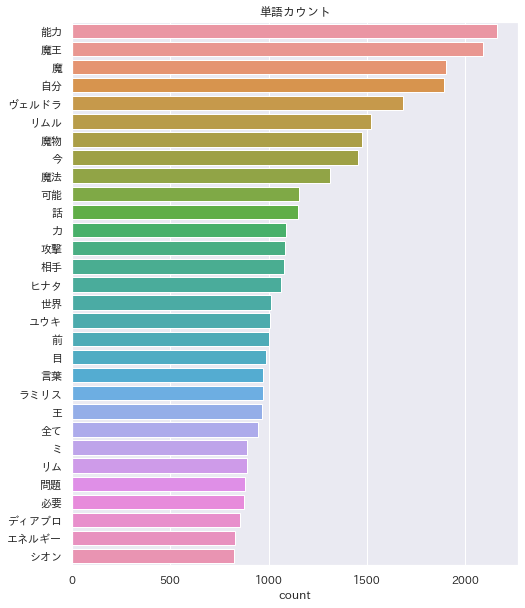

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
sns.set(font="IPAexGothic")
fig = plt.subplots(figsize=(8,10))
plt.title("単語カウント")

sns.countplot(y=wordlist,
              order=[i[0] for i in wordrank.most_common(30)])

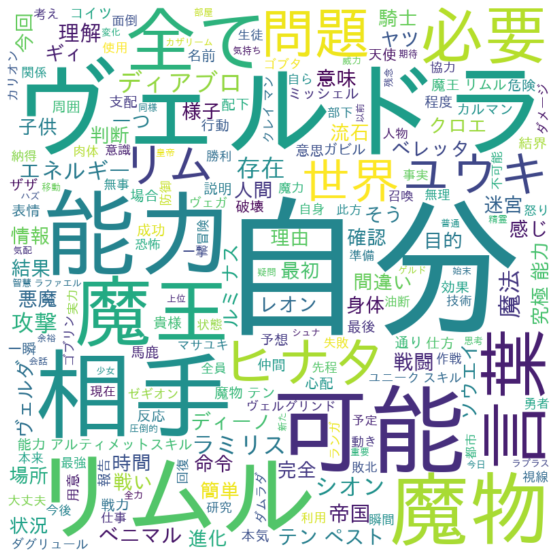

In [13]:
from wordcloud import WordCloud
tdata = [i for i in wordlist if i not in ['女の子フリー', '確か']]
wcdata = " ".join(tdata)
f_path = japanize_matplotlib.get_font_ttf_path()
wc = WordCloud(font_path=f_path,
               background_color='white',
               width=800, height=800).generate(wcdata)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wc,
           interpolation="bilinear")